- jdk : 이클립스 외 다른 앱에서 자바를 사용하기 위해서
- konlpy : 0.5.x버전 설치 -> jpype1 자동 설치됨.

### NLP(Natural language processing) : 자연어처리, 기계와 대화를 나누는 개념.
- Text Classification - 지도학습
- 감성분석 - 지도/비지도
- 텍스트 요약
- 텍스트 군집화 - 비지도

## TA : 텍스트 마이닝, 텍스트에서 의미있는 정보를 찾는것
- 텍스트데이터 -> 피처(벡터값)형태 추출 -> 빈도수, 값 부여
- 피처벡터화 :피처(벡터값)형태 추출

#### 1. 자연어 처리
- 토큰 : 형태소(의미가 있는 가장 작은 말의 단위)


In [1]:
import nltk

In [2]:
import wordcloud

In [3]:
# nltk.download()

In [4]:
## 꼬꼬마
from konlpy.tag import Kkma
kkma = Kkma()

In [5]:
a = '한국어 분석을 시작합니다 재미있어요~~'

In [6]:
## 문장
kkma.sentences(a)

['한국어 분석을 시작합니다', '재미있어요~~']

In [7]:
## 명사
kkma.nouns(a)

['한국어', '분석']

In [8]:
##형태소 분석
kkma.pos(a)

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [9]:
## 한나눔
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [10]:
hannanum.nouns(a)

['한국어', '분석', '시작']

In [11]:
## 형태소 분석, 품사 없이 
hannanum.morphs(a)

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [12]:
hannanum.pos(a)

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [13]:
## 트위터 분석 (구)from konlpy.tag import Twitter -> Okt로 바뀜
from konlpy.tag import Okt
t = Okt()

In [14]:
t.nouns(a)

['한국어', '분석', '시작']

In [15]:
t.morphs(a)

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [16]:
t.pos(a)

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

In [68]:
## wordcloud -> 대통령 국정연설 모아서 워드클라우드
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import platform

In [127]:
text = open('DataScience_Ing/data/09. alice.txt').read()
alice_mask = np.array(Image.open('DataScience_Ing/data/09. alice_mask.png'))

In [ ]:
text

In [128]:
## count 하지 않게할 단어
stopwords = set(STOPWORDS)
stopwords.add("said")

In [51]:
## matplotlib에 한글설정
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

(-0.5, 899.5, 899.5, -0.5)

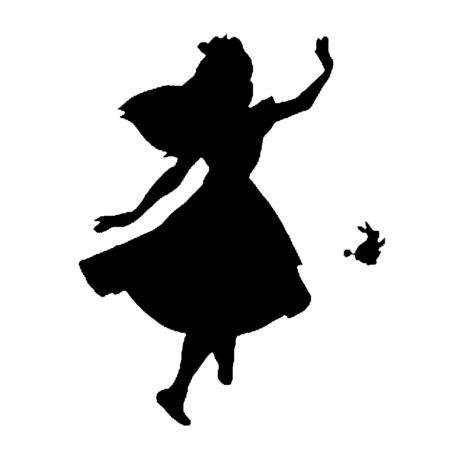

In [63]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')

In [75]:
from nltk.corpus import stopwords

In [129]:
## Alice 1등
wc = WordCloud(background_color='white', max_words=1000, mask=alice_mask,
              stopwords = stopwords, collocations=False)
wc = wc.generate(text)
# wc.words_

{'Alice': 1.0,
 'little': 0.3176178660049628,
 'one': 0.26054590570719605,
 'know': 0.22332506203473945,
 'went': 0.20595533498759305,
 'thing': 0.19851116625310175,
 'time': 0.19106699751861042,
 'thought': 0.18858560794044665,
 'Queen': 0.18858560794044665,
 'see': 0.1662531017369727,
 'King': 0.1588089330024814,
 'well': 0.15632754342431762,
 'Turtle': 0.1513647642679901,
 'now': 0.1488833746898263,
 'head': 0.1488833746898263,
 'began': 0.14392059553349876,
 'way': 0.141439205955335,
 'Hatter': 0.141439205955335,
 'Mock': 0.13895781637717122,
 'say': 0.13647642679900746,
 'quite': 0.13647642679900746,
 'Gryphon': 0.13647642679900746,
 'think': 0.1315136476426799,
 'Rabbit': 0.12655086848635236,
 'much': 0.12655086848635236,
 'first': 0.12655086848635236,
 'voice': 0.12655086848635236,
 'Cat': 0.12406947890818859,
 'go': 0.12406947890818859,
 'come': 0.11910669975186104,
 'never': 0.11662531017369727,
 'Oh': 0.11166253101736973,
 'looked': 0.11166253101736973,
 'got': 0.111662531017

(-0.5, 899.5, 899.5, -0.5)

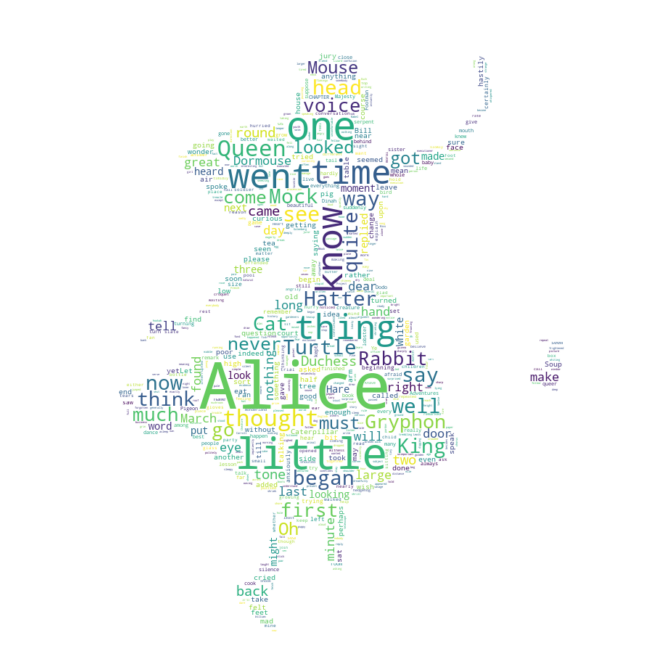

In [130]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [132]:
## 스타워즈
text = open('DataScience_Ing/data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('DataScience_Ing/data/09. stormtrooper_mask.png'))

In [133]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [134]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1, collocations=False).generate(text)
default_colors = wc.to_array()

In [57]:
## **kwargs : 딕셔너리 몇개올지모름.
import random
def grey_color_func(word, font_size, position, orientation, 
                    rondom_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

(-0.5, 1189.5, 1027.5, -0.5)

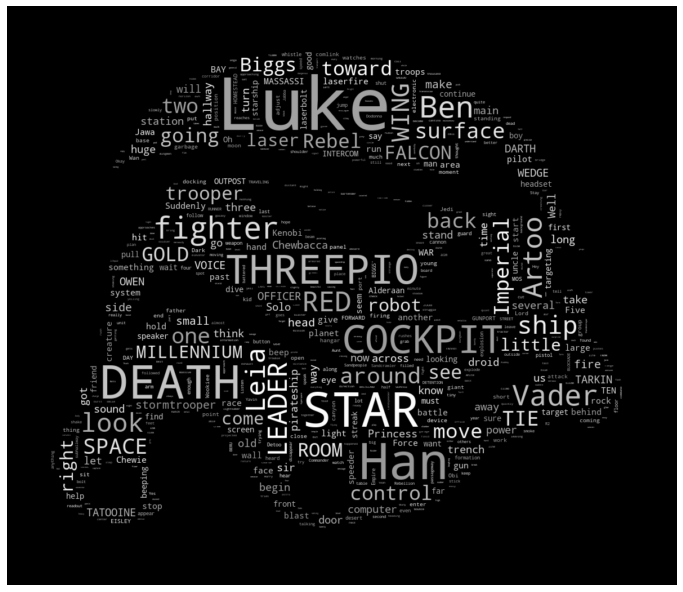

In [135]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')

### 육아휴직관련 법안

In [42]:
from konlpy.corpus import kobill

In [43]:
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [ ]:
doc_ko

In [ ]:
from konlpy.tag import Okt
t = Okt()
## 명사만 추출
tokens_ko = t.nouns(doc_ko)
tokens_ko

In [85]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [ ]:
## nltk.text 구성요소 확인
ko.tokens

In [87]:
print(len(ko.tokens))
print(len(set(ko.tokens)))

735
250


In [88]:
## 빈도수로 정리
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

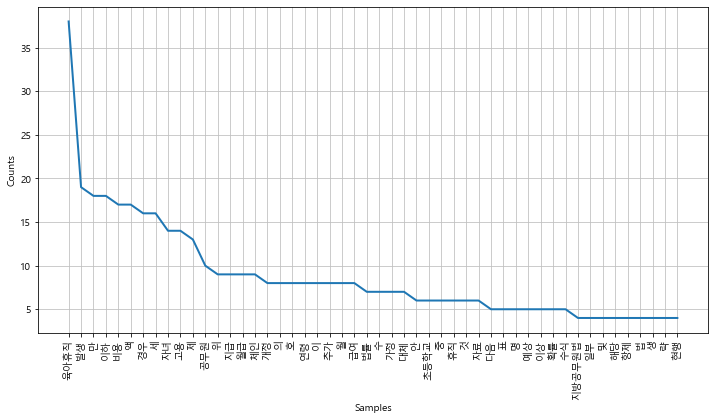

In [89]:
## 상위 50개만
plt.figure(figsize=(12,6))
ko.plot(50)

In [108]:
## stopwords 제거
stop_words =['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를','것','제']


ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '항제',
 '법률',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '휴직',
 '생',
 '략',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현행',
 '세',
 '이하',
 '초등학교',
 '취',
 '세'

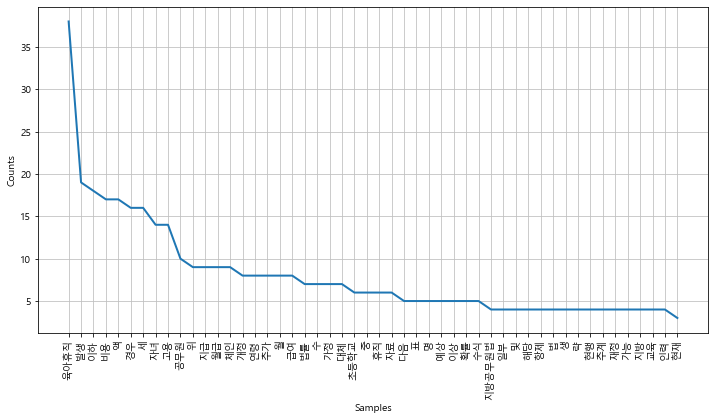

In [109]:
## 리스트 -> nltk.text로 변환
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')
plt.figure(figsize=(12,6))
ko.plot(50)

In [98]:
## nltk.text => .count
ko.count('초등학교')

6

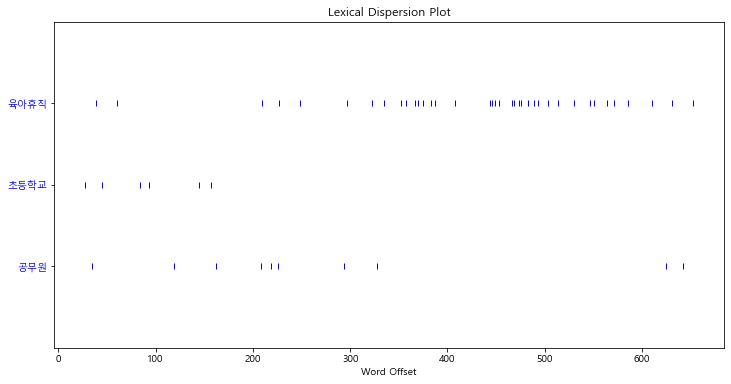

In [104]:
## 원하는 단어의 문서내 위치, 빈도
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교', '공무원'])

In [105]:
## 단어 주변부 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [106]:
## 연이어 사용된 단어 확인
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


In [107]:
## 150 개
data = ko.vocab().most_common(150)

(-0.5, 399.5, 199.5, -0.5)

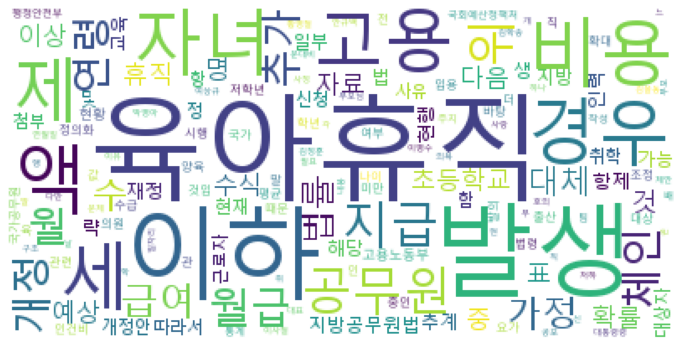

In [117]:
##relative_scaling : 상대크기, 밀도가 달라짐.
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

## 2. Naive Bayes Classifier
- 지도학습
- 두 사건을 독립이라 가정하고 각각의 조건부확률을 가지고 분류

In [136]:
from nltk.tokenize import word_tokenize
import nltk

In [137]:
train=[('i like you','pos'),
      ('i hate you', 'neg'),
      ('you like me', 'neg'),
      ('i like her', 'pos')]

In [138]:
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [ ]:
## train의 각 문장에 대해 all_words의 단어들이 문장에 있나없나
t = [({word:(word in word_tokenize(x[0])) for word in all_words}, x[1])
    for x in train]
t

In [142]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [143]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                      (word in word_tokenize(test_sentence.lower()))
                      for word in all_words}
test_sent_features

{'her': False,
 'hate': False,
 'i': True,
 'like': True,
 'you': False,
 'me': False}

In [144]:
classifier.classify(test_sent_features)

'pos'

Naive Bayes Classifier

In [145]:
pos_tagger = Okt()

In [153]:
train=[('메리가 좋아', 'pos'),
      ('고양이도 좋아','pos'),
      ('난 수업이 지루해','neg'),
      ('메리는 이쁜 고양이야','pos'),
      ('난 마치고 메리랑 놀거야', 'pos')]

In [154]:
all_words=set(word.lower() for sentence in train
             for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [155]:
## feature 추출
## 이중 반복

t = [({word: (word in word_tokenize(x[0]))
      for word in all_words}, x[1])
    for x in train]
t

[({'메리가': True,
   '수업이': False,
   '지루해': False,
   '고양이야': False,
   '좋아': True,
   '난': False,
   '마치고': False,
   '놀거야': False,
   '메리는': False,
   '이쁜': False,
   '고양이도': False,
   '메리랑': False},
  'pos'),
 ({'메리가': False,
   '수업이': False,
   '지루해': False,
   '고양이야': False,
   '좋아': True,
   '난': False,
   '마치고': False,
   '놀거야': False,
   '메리는': False,
   '이쁜': False,
   '고양이도': True,
   '메리랑': False},
  'pos'),
 ({'메리가': False,
   '수업이': True,
   '지루해': True,
   '고양이야': False,
   '좋아': False,
   '난': True,
   '마치고': False,
   '놀거야': False,
   '메리는': False,
   '이쁜': False,
   '고양이도': False,
   '메리랑': False},
  'neg'),
 ({'메리가': False,
   '수업이': False,
   '지루해': False,
   '고양이야': True,
   '좋아': False,
   '난': False,
   '마치고': False,
   '놀거야': False,
   '메리는': True,
   '이쁜': True,
   '고양이도': False,
   '메리랑': False},
  'pos'),
 ({'메리가': False,
   '수업이': False,
   '지루해': False,
   '고양이야': False,
   '좋아': False,
   '난': True,
   '마치고': True,
   '놀거야': True,
   '메리는': False,
   '이쁜': F

In [156]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [150]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [157]:
test_sent_features = {word:
                     (word in word_tokenize(test_sentence))
                     for word in all_words}
test_sent_features

{'메리가': False,
 '수업이': True,
 '지루해': False,
 '고양이야': False,
 '좋아': False,
 '난': True,
 '마치고': False,
 '놀거야': True,
 '메리는': False,
 '이쁜': False,
 '고양이도': False,
 '메리랑': True}

In [158]:
classifier.classify(test_sent_features)

'neg'

In [159]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [160]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [161]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [162]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [164]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [172]:
## 머신러닝에 자료세트 넣음.
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [166]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [168]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [170]:
test_sent_features = {word:(word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [171]:
classifier.classify(test_sent_features)

'pos'